- Study Gini Index
- Compute the toy example using Gini Index
- Change criterion in the imported library, using Gini Index
- Compare Gini Index vs Entropy
- Use another dataset (data.csv)
- Play with parameters:
max_depth
min_samples_split
min_samples_leaf
- Explain your understanding after trying these different parameters


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

### Study Gini Index

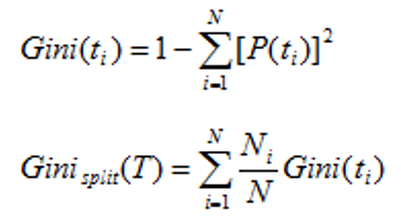
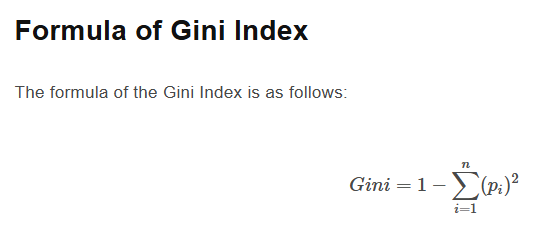

### Compute the toy example using Gini Index

In [ ]:
# Read the dataset
df = pd.read_csv('sources/toy_data.csv')

# Function to calculate Gini Index
def gini_index(y):
    classes = y.value_counts(normalize=True)
    return 1 - sum(classes**2)

# Function to calculate Gini index for a feature (like 'age')
def gini_for_feature(df, feature):
    # Get unique values for the feature
    unique_values = df[feature].unique()
    weighted_gini = 0

    # For each unique value of the feature, calculate the Gini index
    for value in unique_values:
        subset = df[df[feature] == value]
        gini = gini_index(subset['buys computer'])
        # Weight by the proportion of samples in this subset
        weighted_gini += (len(subset) / len(df)) * gini
        
    return weighted_gini

# Calculate and print Gini index for the 'age' feature
gini_age = gini_for_feature(df, 'age')
print(f"Gini Index for 'age': {gini_age}")

# Calculate and print Gini index for the 'income' feature
gini_income = gini_for_feature(df, 'income')
print(f"Gini Index for 'income': {gini_income}")

# Calculate and print Gini index for the 'student' feature
gini_student = gini_for_feature(df, 'student')
print(f"Gini Index for 'student': {gini_student}")

# Calculate and print Gini index for the 'credit rating' feature
gini_credit_rating = gini_for_feature(df, 'credit rating')
print(f"Gini Index for 'credit rating': {gini_credit_rating}")


Gini Index for 'age': 0.34285714285714286
Gini Index for 'income': 0.44047619047619047
Gini Index for 'student': 0.3673469387755103
Gini Index for 'credit rating': 0.42857142857142855


### Change criterion in the imported library, using Gini Index

#### Compare Gini Index vs Entropy

In [29]:
# read data
df = pd.read_csv('sources/toy_data.csv')

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
df['age'] = label_encoder.fit_transform(df['age'])
df['income'] = label_encoder.fit_transform(df['income'])
df['student'] = label_encoder.fit_transform(df['student'])
df['credit rating'] = label_encoder.fit_transform(df['credit rating'])
df['buys computer'] = label_encoder.fit_transform(df['buys computer'])

# Separate features (X) and target (y)
X = df.drop('buys computer', axis=1)
y = df['buys computer']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [30]:
# Train the model
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

# Predict on the test set
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

Evaluation of Gini Criterion
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
[[1 0]
 [0 2]]


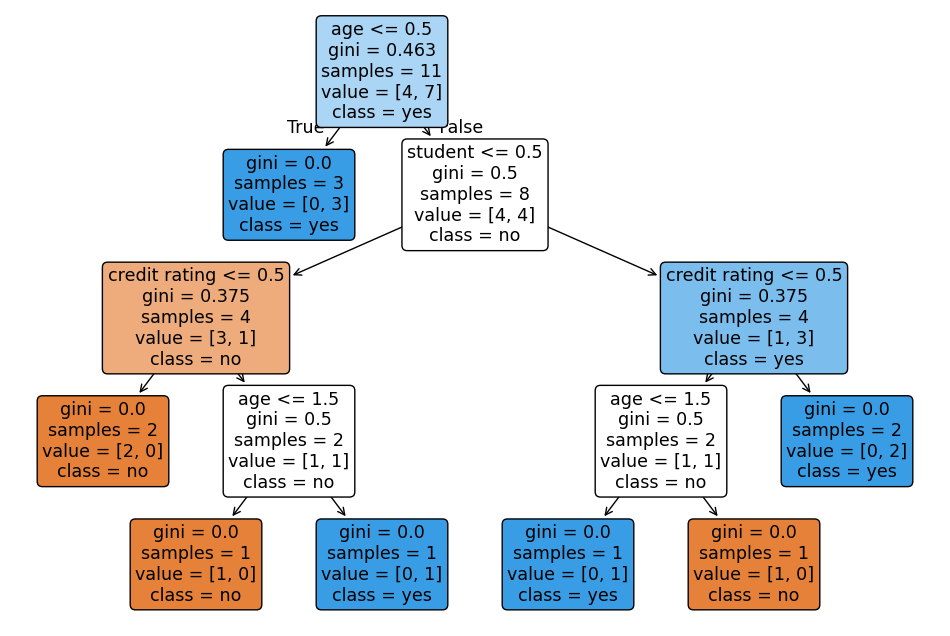

---------------------------------------------------------------------------------------------------
Evaluation of Entropy Criterion
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
[[1 0]
 [0 2]]


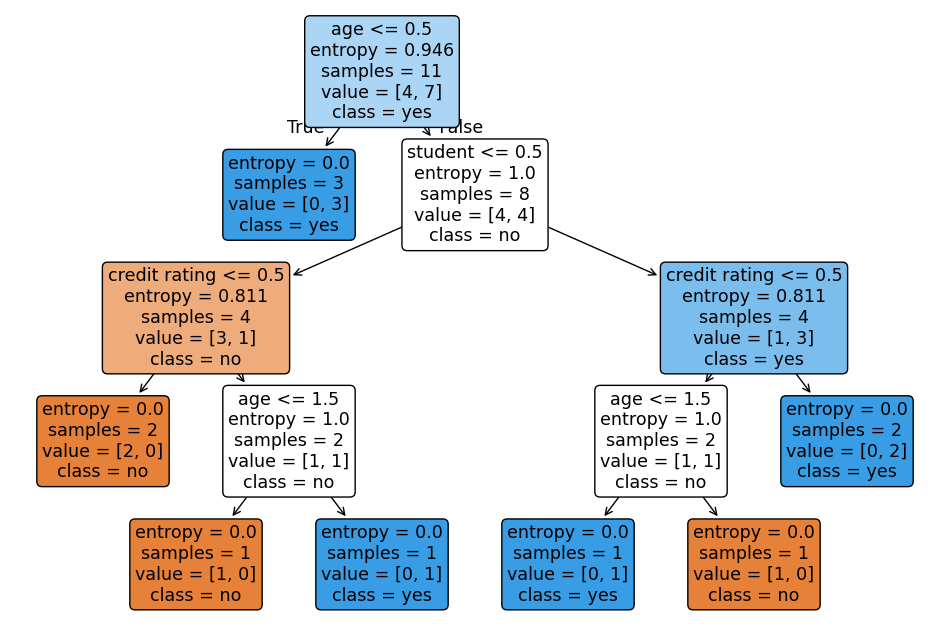

In [31]:
# Evaluation of Gini
print("Evaluation of Gini Criterion")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gini))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True)
plt.show()

#---------------------------------------------------------------------------------------------------
# Evaluation of Entropy
print("---------------------------------------------------------------------------------------------------")
print("Evaluation of Entropy Criterion")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_entropy))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True)
plt.show()

Both **Gini Index** and **Entropy** are impurity measures used in decision trees.

**Formulas**

- **Gini Index**:  $$ Gini = 1 - \sum p_i^2 $$

- **Entropy**:  $$ Entropy = -\sum p_i \log_2(p_i) $$

**Key Differences**
| Measure      | Definition |
|-------------|------------|
| **Gini Index** | Measures impurity based on the probability of misclassification. |
| **Entropy** | Measures impurity based on the amount of information in a node. |

**Ranges (for Binary Classification)**
- **Gini Index Range**: \([0, 0.5]\)  
- **Entropy Range**: \([0, 1]\)  

**Computational Complexity**
- **Gini Index** is simpler and faster to compute since it only involves squaring probabilities.  
- **Entropy** uses a logarithmic function, making it slightly more computationally expensive.  


### Another dataset (data.csv) using Gini Index

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.83      0.83      0.83        18

    accuracy                           0.80        30
   macro avg       0.79      0.79      0.79        30
weighted avg       0.80      0.80      0.80        30

Confusion Matrix:
[[ 9  3]
 [ 3 15]]


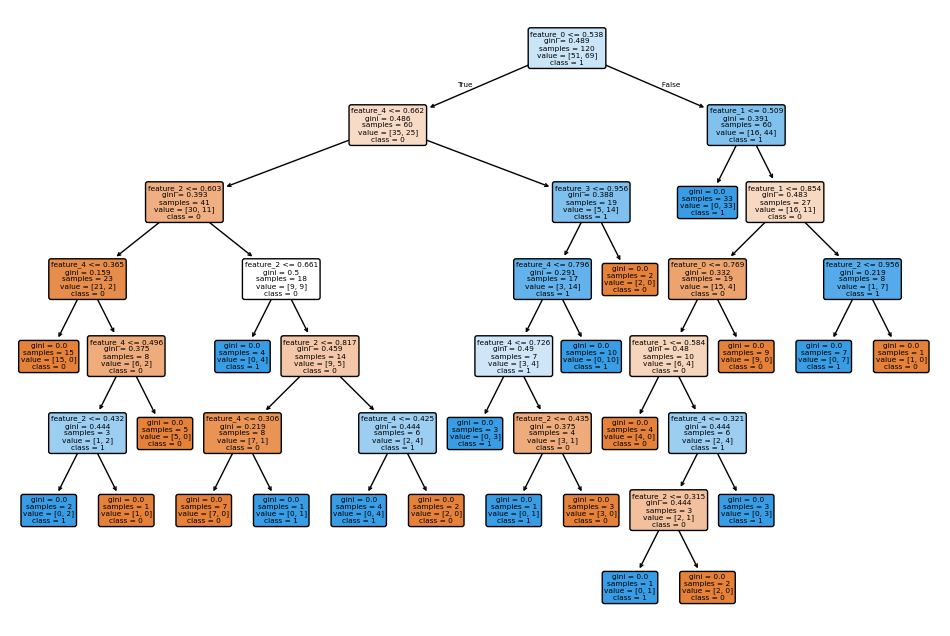

In [4]:
# read data
df = pd.read_csv('sources/dataset.csv')

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.show()


### Play with parameters (dataset.csv)

In [25]:
# Read the dataset
df = pd.read_csv('sources/dataset.csv')

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ranges for hyperparameters
max_depth_values = [3, 5, 8, 10, 15, None]
min_samples_split_values = [2, 10, 20, 30, 40]
min_samples_leaf_values = [1, 2, 4, 6, 8]

# Initialize an empty list to store the results
results_df = []

# Loop over all combinations of hyperparameters
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            # Initialize the Decision Tree classifier with current hyperparameters
            clf = DecisionTreeClassifier(
                criterion='gini', 
                random_state=42, 
                max_depth=max_depth, 
                min_samples_split=min_samples_split, 
                min_samples_leaf=min_samples_leaf
            )

            # Train the model
            clf.fit(X_train, y_train)

            # Predict on the test set
            y_pred = clf.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Store the result as a dictionary
            results_df.append({
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'accuracy': accuracy
            })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results_df)

# Display the results DataFrame
print("Hyperparameter Tuning Results:")
results_df

Hyperparameter Tuning Results:


,max_depth,min_samples_split,min_samples_leaf,accuracy
0,3.0,2,1,0.766667
1,3.0,2,2,0.766667
2,3.0,2,4,0.766667
3,3.0,2,6,0.800000
4,3.0,2,8,0.800000
...,...,...,...,...
145,NaN,40,1,0.800000
146,NaN,40,2,0.800000
147,NaN,40,4,0.800000
148,NaN,40,6,0.800000


In [26]:
results_df[results_df.accuracy > 0.8]

,max_depth,min_samples_split,min_samples_leaf,accuracy
28,5.0,2,6,0.833333
33,5.0,10,6,0.833333
53,8.0,2,6,0.833333
58,8.0,10,6,0.833333
78,10.0,2,6,0.833333
83,10.0,10,6,0.833333
103,15.0,2,6,0.833333
108,15.0,10,6,0.833333
128,NaN,2,6,0.833333
133,NaN,10,6,0.833333


### Explain your understanding after trying these different parameters

**max_depth**:
It defines the maximum number of levels (or "depth") that the decision tree can grow.

**min_samples_split**:
It determines the minimum number of samples required to split an internal node (not a leaf node).

**min_samples_leaf**:
Sets the minimum number of samples that a leaf node must have.

#### **Tuning the three parameters - `max_depth`, `min_samples_split`, and `min_samples_leaf`** can significantly improve the performance of a Decision Tree model, especially in terms of controlling overfitting and underfitting.
